# Capítulo 4 - Vizinhança

pip install geopandas

pip install matplotlib

In [2]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.lib import weights

In [3]:
setores_censitarios_ma = gpd.read_file('../data/vectorial/MA_Malha_Preliminar_2022.zip')
setores_censitarios_ma.head(2)

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,NM_MICRO,CD_MESO,NM_MESO,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_CONCURB,NM_CONCURB,geometry
0,210005505000002P,0.085326,2,Nordeste,21,Maranhão,2100055,Açailândia,210005505,Açailândia,...,Imperatriz,2102,Oeste Maranhense,210021,Açailândia,2105,Imperatriz,2100055,Açailândia,"POLYGON ((-47.50449 -4.94786, -47.50455 -4.948..."
1,210005505000003P,0.070890,2,Nordeste,21,Maranhão,2100055,Açailândia,210005505,Açailândia,...,Imperatriz,2102,Oeste Maranhense,210021,Açailândia,2105,Imperatriz,2100055,Açailândia,"POLYGON ((-47.50441 -4.94579, -47.50447 -4.946..."


<Axes: >

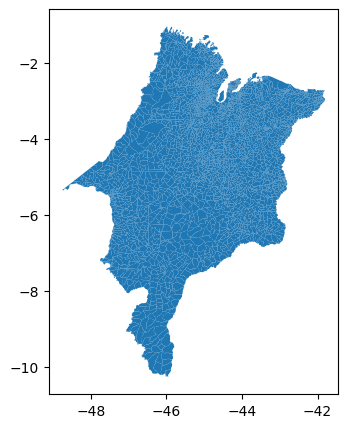

In [4]:
setores_censitarios_ma.plot(figsize=(10,5))

<Axes: >

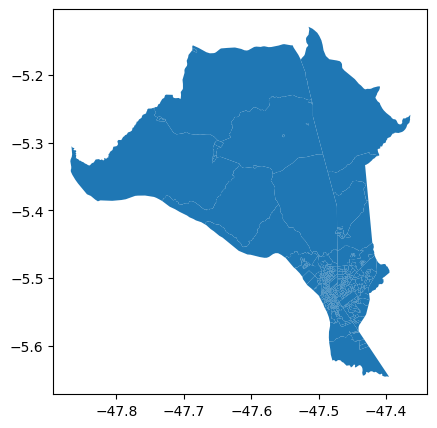

In [5]:
setores_censitarios_itz = setores_censitarios_ma.query("NM_MUN == 'Imperatriz'")
setores_censitarios_itz.plot(figsize=(10,5))


In [17]:
sao_luis = setores_censitarios_ma.query("NM_MUN == 'São Luís'")
sao_luis.reset_index(drop=True, inplace=True)

w_queen = weights.contiguity.Queen.from_dataframe(sao_luis, use_index=False)
w_rook = weights.contiguity.Rook.from_dataframe(sao_luis, use_index=False)
w_knn = weights.distance.KNN.from_dataframe(sao_luis, k=5, use_index=False)


Text(0.5, 1.0, 'KNN 5')

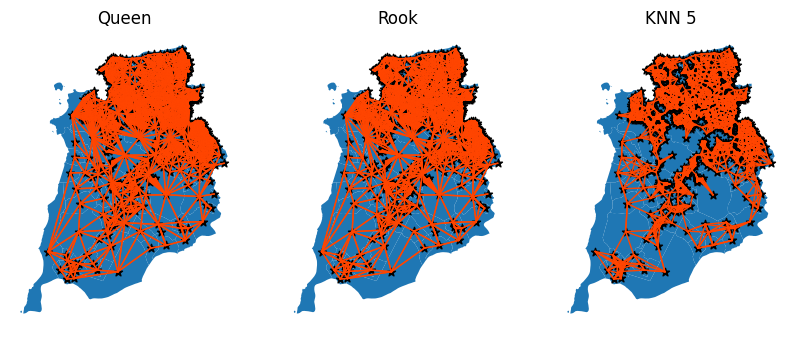

In [20]:
f, axs = plt.subplots(1, 3, figsize=(10, 6))

sao_luis = sao_luis.to_crs('EPSG:3857')

ax = axs[0]
sao_luis.plot(ax=ax)
w_queen.plot(
    sao_luis,
    edge_kws=dict(linewidth=1, color='orangered'),
    node_kws=dict(marker="*"),
    ax=ax
)

ax.set_axis_off()
ax.set_title('Queen')


ax = axs[1]
sao_luis.plot(ax=ax)
w_rook.plot(
    sao_luis,
    edge_kws=dict(linewidth=1, color='orangered'),
    node_kws=dict(marker="*"),
    ax=ax
)

ax.set_axis_off()
ax.set_title('Rook')


ax = axs[2]
sao_luis.plot(ax=ax)
w_knn.plot(
    sao_luis,
    edge_kws=dict(linewidth=1, color='orangered'),
    node_kws=dict(marker="*"),
    ax=ax
)

ax.set_axis_off()
ax.set_title('KNN 5')




